## Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

## Класифікація відгуків IMDb за допомогою рекурентної нейронної мережі RNN

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
196/196 - 11s - 55ms/step - accuracy: 0.7362 - loss: 0.5060 - val_accuracy: 0.8043 - val_loss: 0.4353
Epoch 2/5
196/196 - 5s - 26ms/step - accuracy: 0.8732 - loss: 0.3111 - val_accuracy: 0.8603 - val_loss: 0.3558
Epoch 3/5
196/196 - 5s - 26ms/step - accuracy: 0.9223 - loss: 0.2033 - val_accuracy: 0.8584 - val_loss: 0.3872
Epoch 4/5
196/196 - 5s - 25ms/step - accuracy: 0.9583 - loss: 0.1170 - val_accuracy: 0.8256 - val_loss: 0.4938
Epoch 5/5
196/196 - 5s - 25ms/step - accuracy: 0.9796 - loss: 0.0609 - val_accuracy: 0.8443 - val_loss: 0.5597
Test Loss: 0.5597305297851562, Test Accuracy: 0.8442800045013428


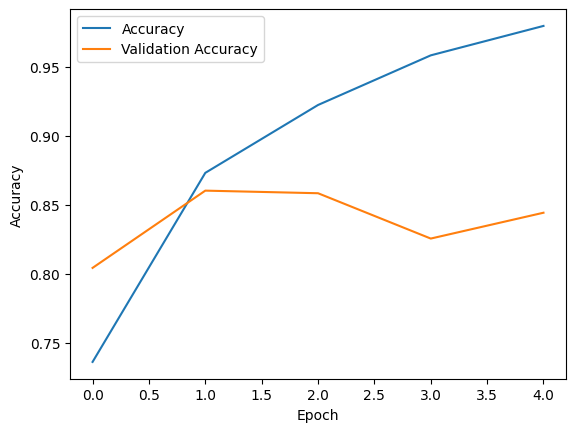

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb                                         # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                     # Послідовна модель Keras
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, SpatialDropout1D  # Шари для RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences                  # Доповнення послідовностей
import matplotlib.pyplot as plt                                                    # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова RNN-моделі ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
rnn_units = 64       # Кількість нейронів у RNN-шарі

model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),  # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                          # Регуляризація: Dropout допомагає уникнути перенавчання
    SimpleRNN(rnn_units),                                                           # Основний рекурентний шар (RNN)
    Dense(1, activation='sigmoid')                                                  # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_rnn.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_rnn = model_rnn.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_rnn}, Test Accuracy: {accuracy_rnn}")          # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_rnn.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Класифікація відгуків IMDb за допомогою двосторонньої рекурентної нейронної мережі RNN

Epoch 1/5
196/196 - 15s - 78ms/step - accuracy: 0.6666 - loss: 0.5825 - val_accuracy: 0.8405 - val_loss: 0.3651
Epoch 2/5
196/196 - 9s - 48ms/step - accuracy: 0.8580 - loss: 0.3379 - val_accuracy: 0.8281 - val_loss: 0.3883
Epoch 3/5
196/196 - 10s - 49ms/step - accuracy: 0.8967 - loss: 0.2621 - val_accuracy: 0.8076 - val_loss: 0.4660
Epoch 4/5
196/196 - 10s - 49ms/step - accuracy: 0.9438 - loss: 0.1541 - val_accuracy: 0.7468 - val_loss: 0.5886
Epoch 5/5
196/196 - 10s - 49ms/step - accuracy: 0.9749 - loss: 0.0777 - val_accuracy: 0.8275 - val_loss: 0.5183
Test Loss: 0.5183480978012085, Test Accuracy: 0.8274800181388855


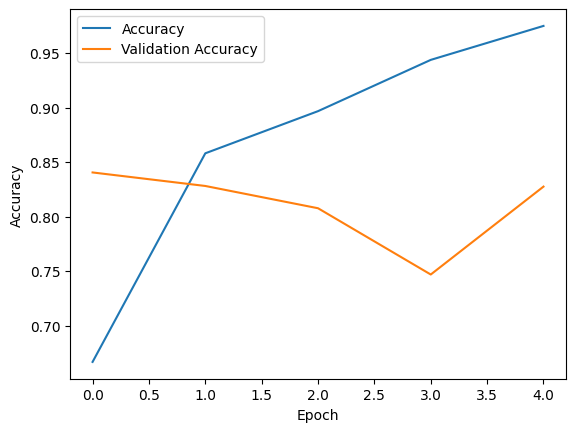

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb                                                        # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                                    # Послідовна модель Keras
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Embedding, Dense, SpatialDropout1D  # Шари для RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences                                 # Доповнення послідовностей
import matplotlib.pyplot as plt                                                                   # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова RNN-моделі з двостороннім обробленням послідовностей ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
rnn_units = 64       # Кількість нейронів у RNN-шарі

model_rnn_bidirectional = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),  # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                          # Регуляризація: Dropout допомагає уникнути перенавчання
    Bidirectional(SimpleRNN(rnn_units)),                                            # Двосторонній SimpleRNN шар з 64 одиницями
    Dense(1, activation='sigmoid')                                                  # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_rnn_bidirectional.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_rnn_bidirectional = model_rnn_bidirectional.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_rnn_bidirectional, accuracy_rnn_bidirectional = model_rnn_bidirectional.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_rnn_bidirectional}, Test Accuracy: {accuracy_rnn_bidirectional}")                        # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_rnn_bidirectional.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_rnn_bidirectional.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Класифікація відгуків IMDb за допомогою глибокої рекурентної нейронної мережі RNN

Epoch 1/5
196/196 - 16s - 80ms/step - accuracy: 0.6284 - loss: 0.6190 - val_accuracy: 0.7540 - val_loss: 0.5688
Epoch 2/5
196/196 - 9s - 48ms/step - accuracy: 0.8418 - loss: 0.3684 - val_accuracy: 0.8160 - val_loss: 0.4214
Epoch 3/5
196/196 - 9s - 48ms/step - accuracy: 0.8738 - loss: 0.2975 - val_accuracy: 0.7332 - val_loss: 0.5588
Epoch 4/5
196/196 - 9s - 48ms/step - accuracy: 0.9444 - loss: 0.1498 - val_accuracy: 0.7920 - val_loss: 0.5955
Epoch 5/5
196/196 - 9s - 48ms/step - accuracy: 0.9792 - loss: 0.0598 - val_accuracy: 0.7800 - val_loss: 0.7429
Test Loss: 0.7428807616233826, Test Accuracy: 0.7799599766731262


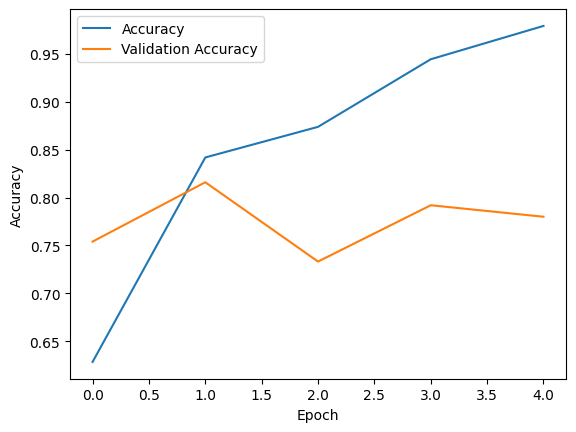

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb                                         # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                     # Послідовна модель Keras
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, SpatialDropout1D  # Шари для RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences                  # Доповнення послідовностей
import matplotlib.pyplot as plt                                                    # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова RNN-моделі ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
rnn_units = 64       # Кількість нейронів у RNN-шарі

model_rnn_deep = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),  # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                          # Регуляризація: Dropout допомагає уникнути перенавчання
    SimpleRNN(rnn_units, return_sequences=True),                                    # Перший рекурентний шар (повертає послідовність)
    SimpleRNN(rnn_units),                                                           # Другий рекурентний шар (без return_sequences)
    Dense(1, activation='sigmoid')                                                  # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_rnn_deep.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_rnn_deep = model_rnn_deep.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_rnn_deep, accuracy_rnn_deep = model_rnn_deep.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_rnn_deep}, Test Accuracy: {accuracy_rnn_deep}")               # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_rnn_deep.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_rnn_deep.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Класифікація відгуків IMDb за допомогою LSTM мережі

Epoch 1/5
196/196 - 74s - 378ms/step - accuracy: 0.7568 - loss: 0.5028 - val_accuracy: 0.8380 - val_loss: 0.3805
Epoch 2/5
196/196 - 69s - 350ms/step - accuracy: 0.8648 - loss: 0.3305 - val_accuracy: 0.8570 - val_loss: 0.3389
Epoch 3/5
196/196 - 69s - 353ms/step - accuracy: 0.8880 - loss: 0.2859 - val_accuracy: 0.8534 - val_loss: 0.3508
Epoch 4/5
196/196 - 69s - 352ms/step - accuracy: 0.8909 - loss: 0.2765 - val_accuracy: 0.7676 - val_loss: 0.4808
Epoch 5/5
196/196 - 68s - 348ms/step - accuracy: 0.8771 - loss: 0.2995 - val_accuracy: 0.8166 - val_loss: 0.4077
Test Loss: 0.407695472240448, Test Accuracy: 0.8165599703788757


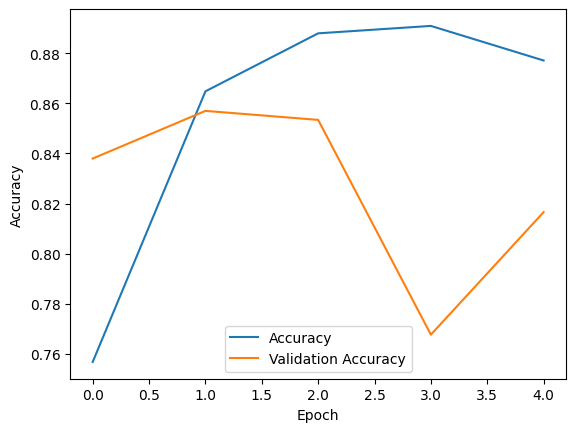

In [4]:
import numpy as np
from tensorflow.keras.datasets import imdb                                    # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                # Послідовна модель Keras
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D  # Шари для LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences             # Доповнення послідовностей
import matplotlib.pyplot as plt                                               # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова LSTM-моделі ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
lstm_units = 64      # Кількість нейронів у LSTM-шарі

model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),  # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                          # Регуляризація: Dropout допомагає уникнути перенавчання
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),                     # Основний рекурентний шар (LSTM)
    Dense(1, activation='sigmoid')                                                  # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_lstm.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_lstm = model_lstm.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_lstm}, Test Accuracy: {accuracy_lstm}")           # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_lstm.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Класифікація відгуків IMDb за допомогою двосторонньої LSTM мережі

Epoch 1/5
196/196 - 109s - 555ms/step - accuracy: 0.7411 - loss: 0.5109 - val_accuracy: 0.8222 - val_loss: 0.3992
Epoch 2/5
196/196 - 104s - 532ms/step - accuracy: 0.8455 - loss: 0.3588 - val_accuracy: 0.8471 - val_loss: 0.3606
Epoch 3/5
196/196 - 105s - 534ms/step - accuracy: 0.8713 - loss: 0.3152 - val_accuracy: 0.8508 - val_loss: 0.3562
Epoch 4/5
196/196 - 104s - 531ms/step - accuracy: 0.8711 - loss: 0.3222 - val_accuracy: 0.8522 - val_loss: 0.3594
Epoch 5/5
196/196 - 104s - 531ms/step - accuracy: 0.9060 - loss: 0.2445 - val_accuracy: 0.8536 - val_loss: 0.3792
Test Loss: 0.3792315125465393, Test Accuracy: 0.8535599708557129


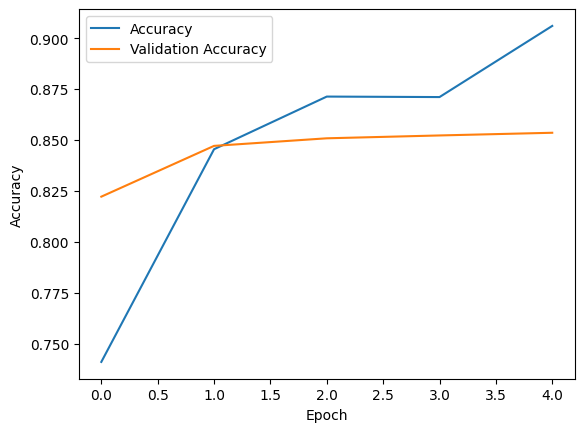

In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb                                                   # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                               # Послідовна модель Keras
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense, SpatialDropout1D  # Шари для LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences                            # Доповнення послідовностей
import matplotlib.pyplot as plt                                                              # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова LSTM-моделі ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
lstm_units = 64      # Кількість нейронів у LSTM-шарі

model_lstm_bidirectional = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),  # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                          # Регуляризація: Dropout допомагає уникнути перенавчання
    Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)),      # Двосторонній LSTM шар з 64 одиницями, з дроп-аутом для регуляризації
    Dense(1, activation='sigmoid')                                                  # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_lstm_bidirectional.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_lstm_bidirectional = model_lstm_bidirectional.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_lstm_bidirectional, accuracy_lstm_bidirectional = model_lstm_bidirectional.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_lstm_bidirectional}, Test Accuracy: {accuracy_lstm_bidirectional}")                         # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_lstm_bidirectional.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_lstm_bidirectional.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Класифікація відгуків IMDb за допомогою глибокої LSTM мережі

Epoch 1/5
196/196 - 193s - 985ms/step - accuracy: 0.7530 - loss: 0.4971 - val_accuracy: 0.8464 - val_loss: 0.3670
Epoch 2/5
196/196 - 188s - 960ms/step - accuracy: 0.8556 - loss: 0.3481 - val_accuracy: 0.8406 - val_loss: 0.3733
Epoch 3/5
196/196 - 188s - 959ms/step - accuracy: 0.8739 - loss: 0.3116 - val_accuracy: 0.8161 - val_loss: 0.4210
Epoch 4/5
196/196 - 188s - 960ms/step - accuracy: 0.8821 - loss: 0.2934 - val_accuracy: 0.8498 - val_loss: 0.3601
Epoch 5/5
196/196 - 188s - 959ms/step - accuracy: 0.8536 - loss: 0.3487 - val_accuracy: 0.8293 - val_loss: 0.4014
Test Loss: 0.40136444568634033, Test Accuracy: 0.8293200135231018


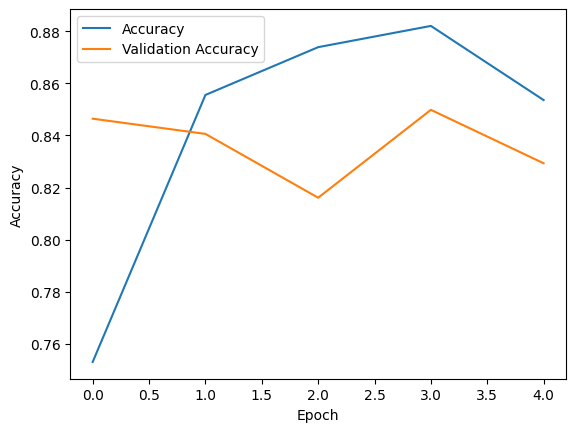

In [6]:
import numpy as np
from tensorflow.keras.datasets import imdb                                    # Завантаження датасету IMDb
from tensorflow.keras.models import Sequential                                # Послідовна модель Keras
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D  # Шари для LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences             # Доповнення послідовностей
import matplotlib.pyplot as plt                                               # Бібліотека для побудови графіків

# === Завантаження та підготовка даних ===
num_words = 10000  # Використовуємо лише 10,000 найчастіше вживаних слів у відгуках
maxlen = 200       # Обмежуємо максимальну довжину відгуку до 200 слів (інші буде усічено або доповнено)

# Завантаження датасету IMDb (він вже поділений на навчальні та тестові дані)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Приведення всіх відгуків до однакової довжини (якщо менше maxlen — доповнюються нулями)
X_train = pad_sequences(X_train, maxlen=maxlen)  # Доповнення для навчального набору
X_test = pad_sequences(X_test, maxlen=maxlen)    # Доповнення для тестового набору

# === Побудова LSTM-моделі ===
embedding_dim = 128  # Розмірність векторів для подання слів у вбудованому просторі
lstm_units = 64      # Кількість нейронів у LSTM-шарі

model_lstm_deep = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),     # Вбудовування слів у векторний простір
    SpatialDropout1D(0.2),                                                             # Регуляризація: Dropout допомагає уникнути перенавчання
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True), # Перший LSTM-шар з поверненням послідовностей
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True), # Другий LSTM-шар з поверненням послідовностей
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),                        # Третій LSTM-шар без повернення послідовностей
    Dense(1, activation='sigmoid')                                                     # Вихідний шар для бінарної класифікації (0 або 1)
])

# === Компіляція моделі ===
model_lstm_deep.compile(
    loss='binary_crossentropy',  # Функція втрат для бінарної класифікації
    optimizer='adam',            # Оптимізатор Adam (адаптивний градієнтний спуск)
    metrics=['accuracy']         # Оцінюємо точність класифікації
)

# === Навчання моделі ===
batch_size = 128  # Розмір пакету даних за одну ітерацію
epochs = 5        # Кількість епох (повних проходів по всьому набору даних)

history_lstm_deep = model_lstm_deep.fit(
    X_train, y_train,                  # Вхідні дані та мітки
    batch_size=batch_size,             # Розмір пакету
    epochs=epochs,                     # Кількість епох
    validation_data=(X_test, y_test),  # Дані для перевірки на тестовому наборі
    verbose=2                          # Виведення результатів у консоль
)

# === Оцінка моделі ===
loss_lstm_deep, accuracy_lstm_deep = model_lstm_deep.evaluate(X_test, y_test, verbose=0)  # Оцінка на тестових даних
print(f"Test Loss: {loss_lstm_deep}, Test Accuracy: {accuracy_lstm_deep}")                # Виведення втрат та точності моделі

# === Побудова графіку точності ===
plt.plot(history_lstm_deep.history['accuracy'], label='Accuracy')                 # Точність на навчальних даних
plt.plot(history_lstm_deep.history['val_accuracy'], label='Validation Accuracy')  # Точність на тестових даних
plt.xlabel('Epoch')     # Підпис осі X (кількість епох)
plt.ylabel('Accuracy')  # Підпис осі Y (точність)
plt.legend()            # Відображення легенди
plt.show()              # Відображення графіку

## Висновки

### Порівняння графіків точності RNN мереж

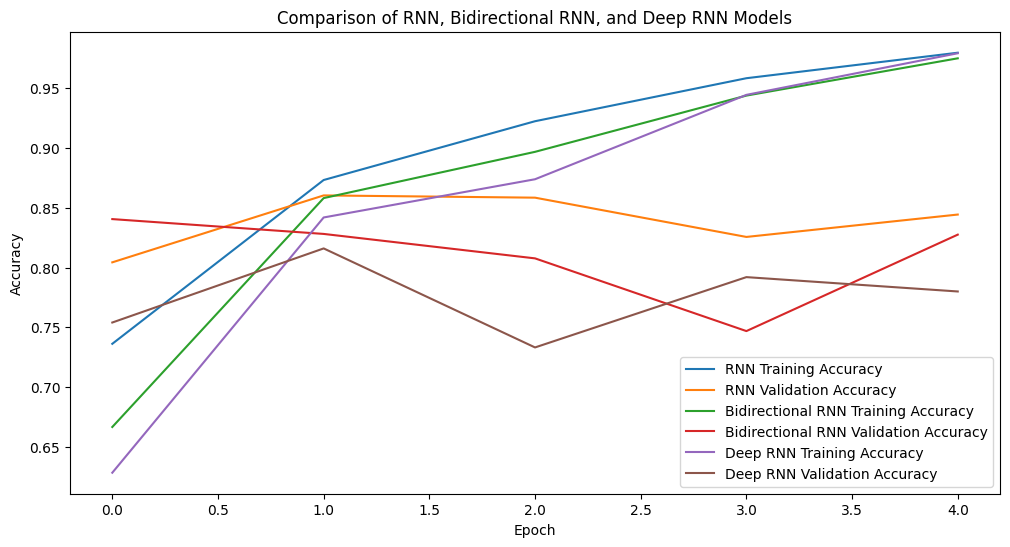

In [7]:
# Побудова графіків для порівняння точності
plt.figure(figsize=(12, 6))

# Графік точності для RNN
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')

# Графік точності для Bidirectional RNN
plt.plot(history_rnn_bidirectional.history['accuracy'], label='Bidirectional RNN Training Accuracy')
plt.plot(history_rnn_bidirectional.history['val_accuracy'], label='Bidirectional RNN Validation Accuracy')

# Графік точності для Deep RNN
plt.plot(history_rnn_deep.history['accuracy'], label='Deep RNN Training Accuracy')
plt.plot(history_rnn_deep.history['val_accuracy'], label='Deep RNN Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Comparison of RNN, Bidirectional RNN, and Deep RNN Models")
plt.show()

### Порівняння графіків точності LSTM мереж

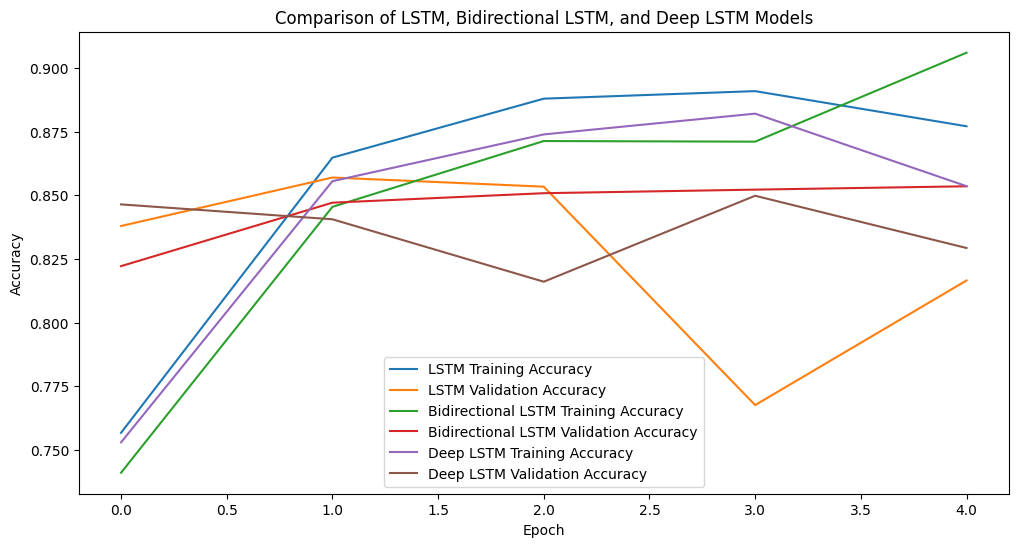

In [8]:
# Побудова графіків для порівняння точності
plt.figure(figsize=(12, 6))

# Графік точності для LSTM
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')

# Графік точності для Bidirectional LSTM
plt.plot(history_lstm_bidirectional.history['accuracy'], label='Bidirectional LSTM Training Accuracy')
plt.plot(history_lstm_bidirectional.history['val_accuracy'], label='Bidirectional LSTM Validation Accuracy')

# Графік точності для Deep LSTM
plt.plot(history_lstm_deep.history['accuracy'], label='Deep LSTM Training Accuracy')
plt.plot(history_lstm_deep.history['val_accuracy'], label='Deep LSTM Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Comparison of LSTM, Bidirectional LSTM, and Deep LSTM Models")
plt.show()

### Оцінка продуктивності моделей RNN у задачі бінарної класифікації

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Отримуємо передбачення для RNN
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn_binary = (y_pred_rnn > 0.5).astype(int)  # Перетворення в 0 або 1

# Отримуємо передбачення для Bidirectional RNN
y_pred_rnn_bidirectional = model_rnn_bidirectional.predict(X_test)
y_pred_rnn_bidirectional_binary = (y_pred_rnn_bidirectional > 0.5).astype(int)

# Отримуємо передбачення для Deep RNN
y_pred_rnn_deep = model_rnn_deep.predict(X_test)
y_pred_rnn_deep_binary = (y_pred_rnn_deep > 0.5).astype(int)

# Розрахунок метрик для RNN
precision_rnn = precision_score(y_test, y_pred_rnn_binary)
recall_rnn = recall_score(y_test, y_pred_rnn_binary)
f1_rnn = f1_score(y_test, y_pred_rnn_binary)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn_binary)

# Розрахунок метрик для Bidirectional RNN
precision_rnn_bidirectional = precision_score(y_test, y_pred_rnn_bidirectional_binary)
recall_rnn_bidirectional = recall_score(y_test, y_pred_rnn_bidirectional_binary)
f1_rnn_bidirectional = f1_score(y_test, y_pred_rnn_bidirectional_binary)
accuracy_rnn_bidirectional = accuracy_score(y_test, y_pred_rnn_bidirectional_binary)

# Розрахунок метрик для Deep RNN
precision_rnn_deep = precision_score(y_test, y_pred_rnn_deep_binary)
recall_rnn_deep = recall_score(y_test, y_pred_rnn_deep_binary)
f1_rnn_deep = f1_score(y_test, y_pred_rnn_deep_binary)
accuracy_rnn_deep = accuracy_score(y_test, y_pred_rnn_deep_binary)

# Виведення результатів
print(f"RNN -> Precision: {precision_rnn}, Recall: {recall_rnn}, F1-Score: {f1_rnn}, Accuracy: {accuracy_rnn}")
print(f"Bidirectional RNN -> Precision: {precision_rnn_bidirectional}, Recall: {recall_rnn_bidirectional}, F1-Score: {f1_rnn_bidirectional}, Accuracy: {accuracy_rnn_bidirectional}")
print(f"Deep RNN -> Precision: {precision_rnn_deep}, Recall: {recall_rnn_deep}, F1-Score: {f1_rnn_deep}, Accuracy: {accuracy_rnn_deep}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step
RNN -> Precision: 0.8721141374837873, Recall: 0.80688, F1-Score: 0.838229794307085, Accuracy: 0.84428
Bidirectional RNN -> Precision: 0.8226531094821471, Recall: 0.83496, F1-Score: 0.8287608687021082, Accuracy: 0.82748
Deep RNN -> Precision: 0.7876695437731196, Recall: 0.76656, F1-Score: 0.7769714169876343, Accuracy: 0.77996


### Оцінка продуктивності моделей LSTM у задачі бінарної класифікації

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Отримуємо передбачення для LSTM
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Перетворення в 0 або 1

# Отримуємо передбачення для Bidirectional LSTM
y_pred_lstm_bidirectional = model_lstm_bidirectional.predict(X_test)
y_pred_lstm_bidirectional_binary = (y_pred_lstm_bidirectional > 0.5).astype(int)

# Отримуємо передбачення для Deep LSTM
y_pred_lstm_deep = model_lstm_deep.predict(X_test)
y_pred_lstm_deep_binary = (y_pred_lstm_deep > 0.5).astype(int)

# Розрахунок метрик для LSTM
precision_lstm = precision_score(y_test, y_pred_lstm_binary)
recall_lstm = recall_score(y_test, y_pred_lstm_binary)
f1_lstm = f1_score(y_test, y_pred_lstm_binary)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm_binary)

# Розрахунок метрик для Bidirectional LSTM
precision_lstm_bidirectional = precision_score(y_test, y_pred_lstm_bidirectional_binary)
recall_lstm_bidirectional = recall_score(y_test, y_pred_lstm_bidirectional_binary)
f1_lstm_bidirectional = f1_score(y_test, y_pred_lstm_bidirectional_binary)
accuracy_lstm_bidirectional = accuracy_score(y_test, y_pred_lstm_bidirectional_binary)

# Розрахунок метрик для Deep LSTM
precision_lstm_deep = precision_score(y_test, y_pred_lstm_deep_binary)
recall_lstm_deep = recall_score(y_test, y_pred_lstm_deep_binary)
f1_lstm_deep = f1_score(y_test, y_pred_lstm_deep_binary)
accuracy_lstm_deep = accuracy_score(y_test, y_pred_lstm_deep_binary)

# Виведення результатів
print(f"LSTM -> Precision: {precision_lstm}, Recall: {recall_lstm}, F1-Score: {f1_lstm}, Accuracy: {accuracy_lstm}")
print(f"Bidirectional LSTM -> Precision: {precision_lstm_bidirectional}, Recall: {recall_lstm_bidirectional}, F1-Score: {f1_lstm_bidirectional}, Accuracy: {accuracy_lstm_bidirectional}")
print(f"Deep LSTM -> Precision: {precision_lstm_deep}, Recall: {recall_lstm_deep}, F1-Score: {f1_lstm_deep}, Accuracy: {accuracy_lstm_deep}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 197ms/step
LSTM -> Precision: 0.8095275344180225, Recall: 0.82792, F1-Score: 0.8186204714443917, Accuracy: 0.81656
Bidirectional LSTM -> Precision: 0.824509875908657, Recall: 0.89832, F1-Score: 0.8598338374363489, Accuracy: 0.85356
Deep LSTM -> Precision: 0.8492406888945448, Recall: 0.8008, F1-Score: 0.8243093012722856, Accuracy: 0.82932


### Висновки щодо продуктивності моделей

1. RNN vs. LSTM
- LSTM моделі загалом показали кращу продуктивність, ніж RNN.
- Простий LSTM (F1-score: 0.8186, Accuracy: 81.66%) перевершує простий RNN (F1-score: 0.8382, Accuracy: 84.42%), але деякі RNN-моделі мають кращі показники.
- Bidirectional LSTM (F1: 0.8598, Accuracy: 85.35%) – лідер за продуктивністю серед усіх моделей.
- Deep RNN (F1: 0.777, Accuracy: 77.99%) – найслабший результат серед усіх варіантів.

2. Bidirectional vs. Deep
- У всіх випадках Bidirectional версії показують вищі метрики, ніж глибокі (Deep) версії.
- Bidirectional LSTM (85.35% Accuracy, 0.8598 F1) → найкраща модель за всіма метриками.
- Deep моделі (як RNN, так і LSTM) мають нижчу точність і F1-score, що може вказувати на перенавчання або неефективне використання глибокої архітектури.

3. Загальні рекомендації
- Якщо потрібна найкраща продуктивність, варто використовувати Bidirectional LSTM.
- RNN підходить для менш складних завдань, але його базові варіанти поступаються LSTM.
- Deep архітектури не дають помітних покращень, а в деяких випадках навіть погіршують результати.
- Можливо, варто оптимізувати глибокі моделі, змінюючи кількість шарів або використовуючи додаткові механізми, такі як Dropout або Batch Normalization.

4. Вердикт
- Bidirectional LSTM — найкращий вибір для цього завдання!